In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])  # квалификация репетитора
X

array([[   1,    1,    1,    1,    1,    1,    1,    1,    1,    1],
       [   1,    1,    2,    1,    3,    0,    5,   10,    1,    2],
       [ 500,  700,  750,  600, 1450,  800, 1500, 2000,  450, 1000],
       [   1,    1,    2,    1,    2,    1,    3,    3,    1,    2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]
y

[45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + 2 * lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [5]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [6]:
X_st = X.copy().astype(np.float64)
X_st[1] = (X[1] - X[1].mean()) / X[1].std()
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [7]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [8]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39426057,  6.1198387 ,  1.43144695,  4.11550651])

In [9]:
lambda_range = [10**n for n in range(-3, 1)]
lambda_range

[0.001, 0.01, 0.1, 1]

In [10]:
W, w_0, w_1, w_2, w_3 = [], [], [], [], []

In [11]:
for lambda_ in lambda_range:
    w_arr = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_)
    w_0.append(w_arr[0])
    w_1.append(w_arr[1])
    w_2.append(w_arr[2])
    w_3.append(w_arr[3])

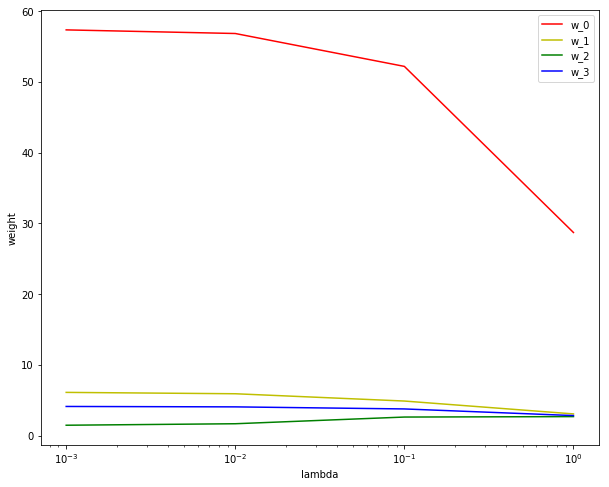

In [12]:
plt.figure(figsize=(10, 8))
plt.xscale('log')
plt.xlabel('lambda')
plt.ylabel('weight')
plt.plot(lambda_range, w_0, color='r', label = "w_0")
plt.plot(lambda_range, w_1, color='y', label = "w_1")
plt.plot(lambda_range, w_2, color='g', label = "w_2")
plt.plot(lambda_range, w_3, color='b', label = "w_3")
plt.legend()

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Технически можно, но будет применено 1 масштабирование: или только стандартизация, или только нормализация 
(в зависимости от того что было сделано последним). Поэтому масштабируем только по 1 признаку.